In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
file='sunrise.csv'
folder='dawn'

In [0]:
file='sunset.csv'
folder='dusk'

In [0]:
path=Path('')
dest=path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.ls()

[PosixPath('.config'),
 PosixPath('sunset.csv'),
 PosixPath('cleaned.csv'),
 PosixPath('dusk'),
 PosixPath('sunrise.csv'),
 PosixPath('models'),
 PosixPath('dawn'),
 PosixPath('sample_data')]

In [0]:
classes=['dawn','dusk']

In [12]:
download_images(path/file, dest, max_pics=200)

In [13]:
file

'sunset.csv'

In [14]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dawn


cannot identify image file <_io.BufferedReader name='dawn/00000028.png'>
cannot identify image file <_io.BufferedReader name='dawn/00000096.jpg'>
cannot identify image file <_io.BufferedReader name='dawn/00000087.jpg'>
dusk


cannot identify image file <_io.BufferedReader name='dusk/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='dusk/00000021.jpg'>
cannot identify image file <_io.BufferedReader name='dusk/00000057.jpg'>


In [0]:
??download_images

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['dawn', 'dusk']

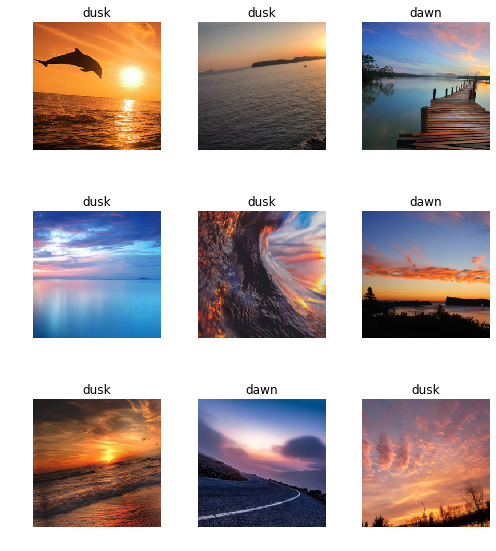

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dawn', 'dusk'], 2, 155, 38)

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 164240986.61it/s]


In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.881239,0.751563,0.552632,00:03
1,0.796474,0.739814,0.473684,00:02
2,0.709461,0.745632,0.394737,00:02
3,0.650798,0.731679,0.394737,00:02


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


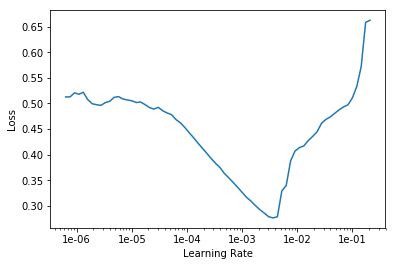

In [24]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(4, max_lr=slice(2e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.132756,1.815103,0.394737,00:02
1,0.106984,1.855659,0.342105,00:02
2,0.083119,1.909211,0.342105,00:02
3,0.066548,1.890314,0.342105,00:02


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

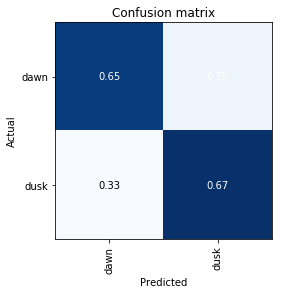

In [31]:
interp.plot_confusion_matrix(learn)

In [0]:
from fastai.widgets import *

In [11]:
db = (ImageList.from_folder(path)
                   .no_split()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:171: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds,idxs,path)